In [1]:
# directory setup
import os
if os.getcwd().endswith("notebooks"):
    os.chdir("..")

dir = os.getcwd()

In [28]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.data_handler import *

In [3]:
flights_data = load_csv(dir + "/data/raw/flights.csv")
hotels_data = load_csv(dir + "/data/raw/hotels.csv")
users_data = load_csv(dir + "/data/raw/users.csv")

In [4]:
# dataset first view
flights_data.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019


In [24]:
hotels_data.head()

,travelCode,userCode,name,place,days,price,total,date
0,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,9/26/2019
1,2,0,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019
2,7,0,Hotel K,Salvador (BH),3,263.41,790.23,11/14/2019
3,11,0,Hotel K,Salvador (BH),4,263.41,1053.64,12/12/2019
4,13,0,Hotel A,Florianopolis (SC),1,313.02,313.02,12/26/2019


In [19]:
users_data.head()

,code,company,name,gender,age
0,0,4You,Roy Braun,male,21
1,1,4You,Joseph Holsten,male,37
2,2,4You,Wilma Mcinnis,female,48
3,3,4You,Paula Daniel,female,23
4,4,4You,Patricia Carson,female,44


In [47]:
# dataset shape (rows x columns)
print("Flights_data =", flights_data.shape)
print("Hotels_data =", hotels_data.shape)
print("Users_data =", users_data.shape)

Flights_data = (271888, 10)
Hotels_data = (40552, 8)
Users_data = (1340, 5)


In [4]:
# dataset information
flights_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   travelCode  271888 non-null  int64  
 1   userCode    271888 non-null  int64  
 2   from        271888 non-null  object 
 3   to          271888 non-null  object 
 4   flightType  271888 non-null  object 
 5   price       271888 non-null  float64
 6   time        271888 non-null  float64
 7   distance    271888 non-null  float64
 8   agency      271888 non-null  object 
 9   date        271888 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 20.7+ MB


In [22]:
hotels_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40552 entries, 0 to 40551
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   travelCode  40552 non-null  int64  
 1   userCode    40552 non-null  int64  
 2   name        40552 non-null  object 
 3   place       40552 non-null  object 
 4   days        40552 non-null  int64  
 5   price       40552 non-null  float64
 6   total       40552 non-null  float64
 7   date        40552 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 2.5+ MB


In [23]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   code     1340 non-null   int64 
 1   company  1340 non-null   object
 2   name     1340 non-null   object
 3   gender   1340 non-null   object
 4   age      1340 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 52.5+ KB


In [5]:
# dataset columns
flights_data.columns.tolist()

['travelCode',
 'userCode',
 'from',
 'to',
 'flightType',
 'price',
 'time',
 'distance',
 'agency',
 'date']

In [28]:
hotels_data.columns.tolist()

['travelCode', 'userCode', 'name', 'place', 'days', 'price', 'total', 'date']

In [29]:
users_data.columns.tolist()

['code', 'company', 'name', 'gender', 'age']

In [34]:
# null values
flights_data.isnull().sum()

travelCode    0
userCode      0
from          0
to            0
flightType    0
price         0
time          0
distance      0
agency        0
date          0
dtype: int64

In [35]:
hotels_data.isnull().sum()

travelCode    0
userCode      0
name          0
place         0
days          0
price         0
total         0
date          0
dtype: int64

In [36]:
users_data.isnull().sum()

code       0
company    0
name       0
gender     0
age        0
dtype: int64

In [37]:
flights_data.nunique()

travelCode    135944
userCode        1335
from               9
to                 9
flightType         3
price            490
time              33
distance          35
agency             3
date             999
dtype: int64

In [38]:
hotels_data.nunique()

travelCode    40552
userCode       1310
name              9
place             9
days              4
price             9
total            36
date            199
dtype: int64

In [39]:
users_data.nunique()

code       1340
company       5
name       1338
gender        3
age          45
dtype: int64

In [43]:
flights_data.duplicated().sum()

np.int64(0)

In [44]:
hotels_data.duplicated().sum()

np.int64(0)

In [45]:
users_data.duplicated().sum()

np.int64(0)

### Data Wrangling

In [36]:
from src.data_wrangling import wrangle_flights, wrangle_hotels, wrangle_users

In [37]:
# wrangle copies
flights_wr = wrangle_flights(flights_data)
hotels_wr  = wrangle_hotels(hotels_data)
users_wr   = wrangle_users(users_data)

In [38]:
flights_wr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   travelcode  271888 non-null  int64         
 1   usercode    271888 non-null  int64         
 2   from        271888 non-null  string        
 3   to          271888 non-null  string        
 4   flighttype  271888 non-null  string        
 5   price       271888 non-null  float64       
 6   time        271888 non-null  float64       
 7   distance    271888 non-null  float64       
 8   agency      271888 non-null  string        
 9   date        271888 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), string(4)
memory usage: 20.7 MB


In [39]:
hotels_wr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40552 entries, 0 to 40551
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   travelcode  40552 non-null  int64         
 1   usercode    40552 non-null  int64         
 2   name        40552 non-null  string        
 3   place       40552 non-null  string        
 4   days        40552 non-null  int64         
 5   price       40552 non-null  float64       
 6   total       40552 non-null  float64       
 7   date        40552 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), string(2)
memory usage: 2.5 MB


In [40]:
users_wr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   code     1340 non-null   int64 
 1   company  1340 non-null   string
 2   name     1340 non-null   string
 3   gender   1340 non-null   string
 4   age      1340 non-null   int64 
dtypes: int64(2), string(3)
memory usage: 52.5 KB


In [41]:
save_csv(flights_wr, dir + "/data/wrangled/flights_wrangled.csv")
save_csv(hotels_wr, dir + "/data/wrangled/hotels_wrangled.csv")
save_csv(users_wr, dir + "/data/wrangled/users_wrangled.csv")

### Exploratory Data Analysis (EDA)

#### Flights

##### Univariate Analysis

In [43]:
# Numerical Columns
flights_wr.describe()

,travelcode,usercode,price,time,distance,date
count,271888.000000,271888.000000,271888.00000,271888.000000,271888.000000,271888
mean,67971.500000,667.505495,957.37503,1.421147,546.955535,2021-01-11 05:25:56.052492032
min,0.000000,0.000000,301.51000,0.440000,168.220000,2019-09-26 00:00:00
25%,33985.750000,326.000000,672.66000,1.040000,401.660000,2020-04-02 00:00:00
50%,67971.500000,659.000000,904.00000,1.460000,562.140000,2020-11-14 00:00:00
75%,101957.250000,1011.000000,1222.24000,1.760000,676.530000,2021-09-09 00:00:00
max,135943.000000,1339.000000,1754.17000,2.440000,937.770000,2023-07-24 00:00:00
std,39243.724665,389.523127,362.31189,0.542541,208.851288,NaN


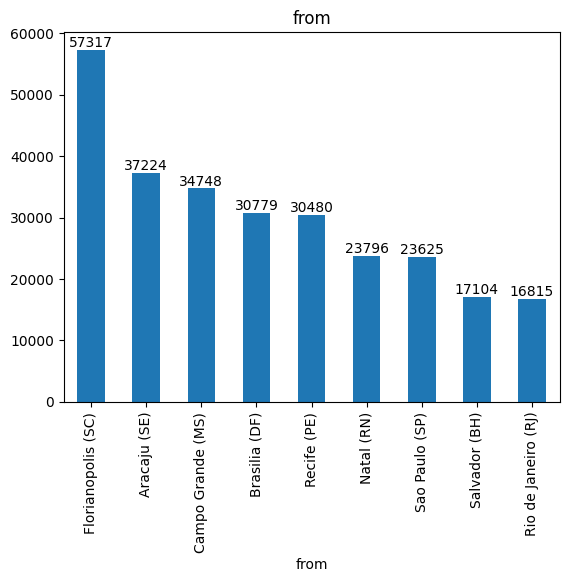

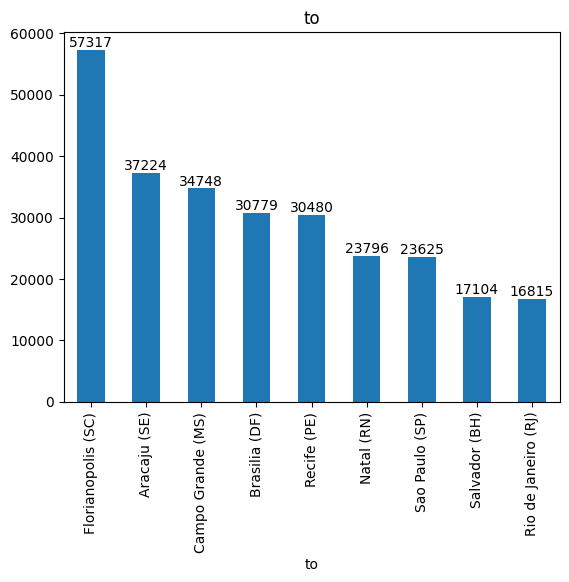

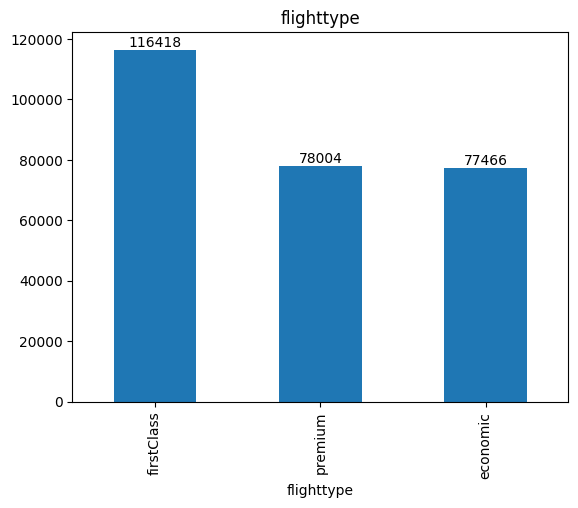

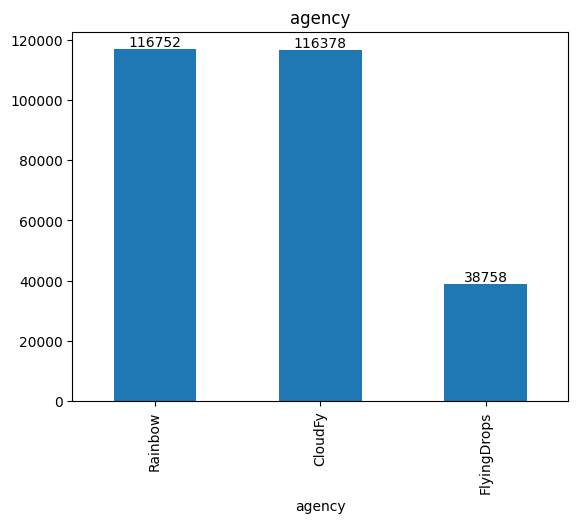

In [45]:
# Categorical Columns
cat_cols = ["from", "to", "flighttype", "agency"]

for col in cat_cols:
    ax = flights_wr[col].value_counts().head(10).plot(kind="bar", title=col)

    for bar in ax.patches:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                int(bar.get_height()), ha='center', va='bottom')

    plt.show()

##### Bivariate Analysis

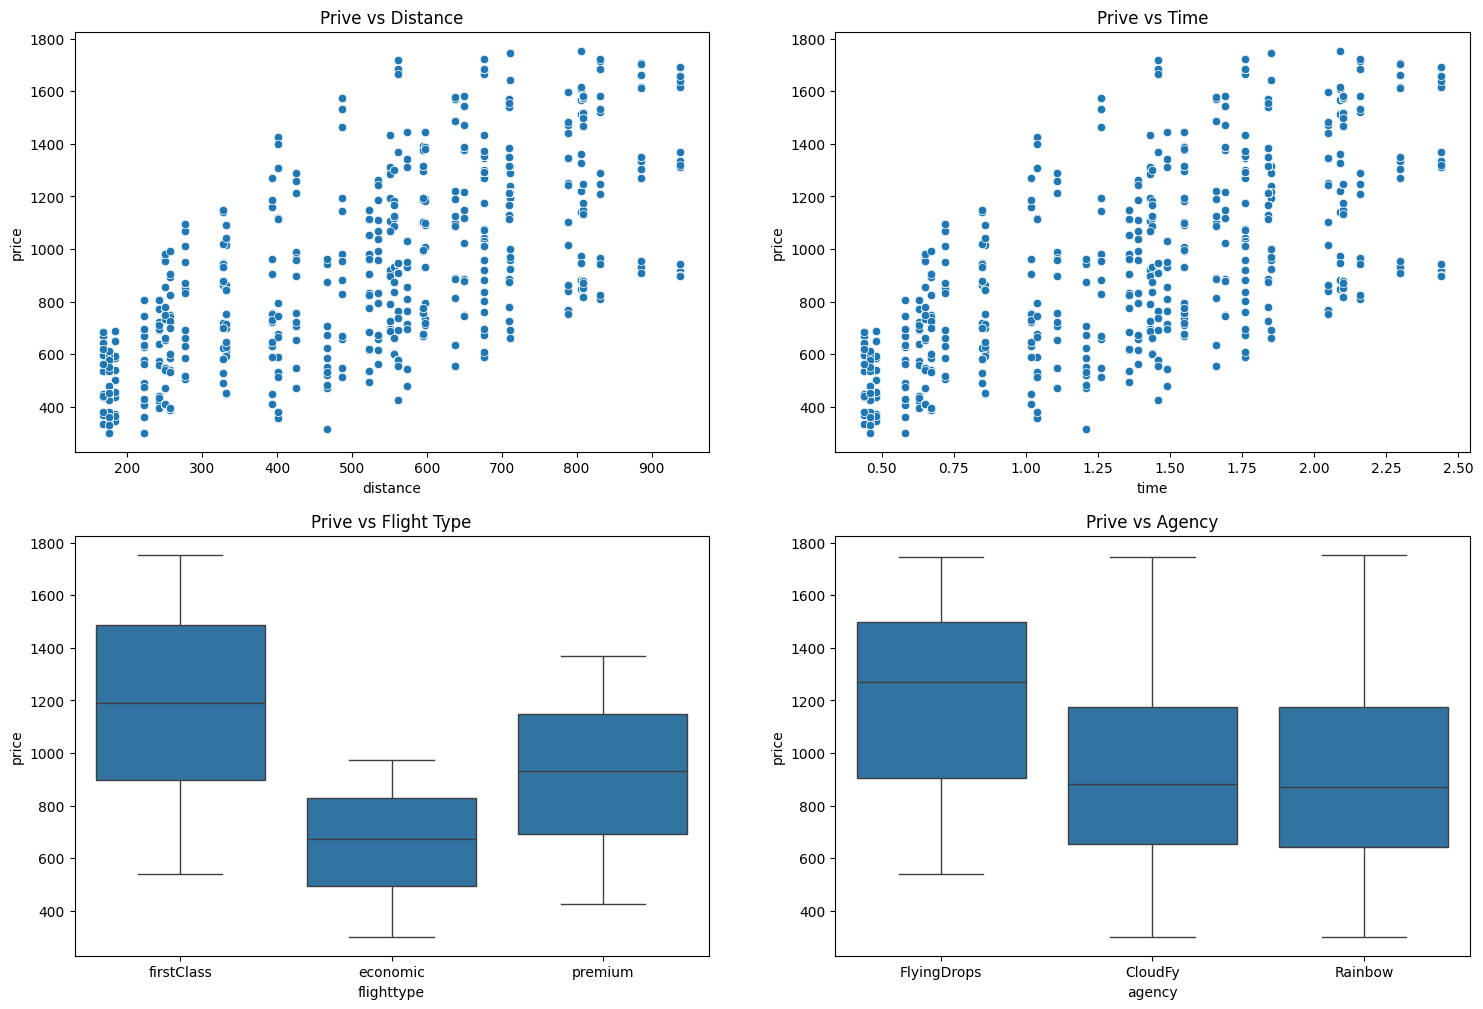

In [57]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

sns.scatterplot(ax = axes[0,0], data = flights_wr, x = "distance", y = "price").set_title("Prive vs Distance")
sns.scatterplot(ax = axes[0,1], data = flights_wr, x = "time", y = "price").set_title("Prive vs Time")
sns.boxplot(ax = axes[1,0], data = flights_wr, x = "flighttype", y = "price").set_title("Prive vs Flight Type")
sns.boxplot(ax = axes[1,1], data = flights_wr, x = "agency", y = "price").set_title("Prive vs Agency")

plt.show()

##### Multivariate Analysis

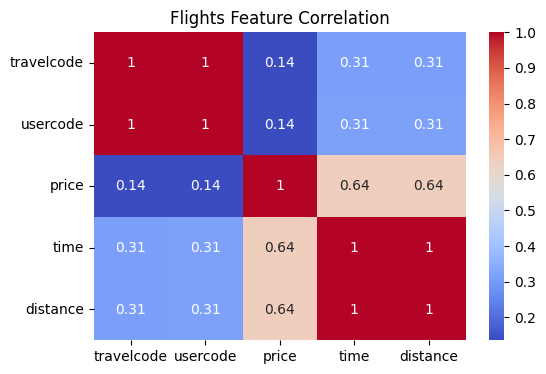

In [60]:
# Correlation heatmap
#corr = flights[num_cols.corr()

plt.figure(figsize=(6,4))
sns.heatmap(flights_wr.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Flights Feature Correlation")
plt.show()

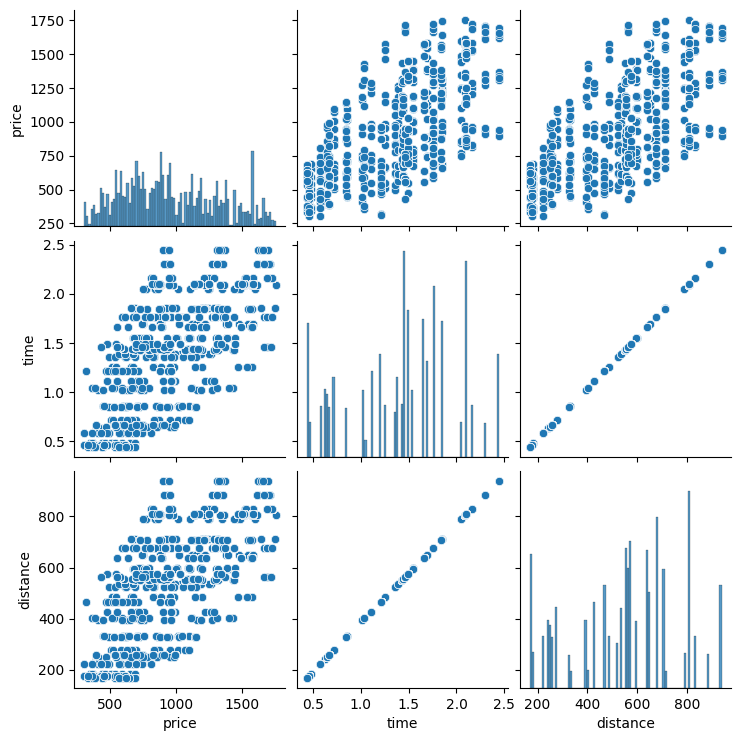

In [66]:
# pair plot
columns = ["price","time","distance"]

sns.pairplot(flights_wr[columns])
plt.show()